In [17]:
from sklearn.datasets import make_blobs
import numpy as np
x = make_blobs(n_samples= 300 , centers = 4 , cluster_std = 0.5 , random_state=42)

from sklearn.metrics import silhouette_score , make_scorer

def silhouette_score(estimator , x , y=None): 
    labels = estimator.fit_predict(x)
    if len(set(labels))<2 :
        return -1.0
    return silhouette_score(x , labels)


sil_scoring = make_scorer(silhouette_score, greater_is_better = True)

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
pipe = Pipeline([
    ("scaler" , StandardScaler()),
    ("kmeans" , KMeans(random_state = 42))])

param_grid = {
    "kmeans__n_clusters" : list(range(2,11)),
    "kmeans__init" : ["k-means++" , "random" ],
    "kmeans__n_init" : [5 , 10 ,20],
    "kmeans__algorithm" : ["lloyd" , "elkan" ]
}

grid = GridSearchCV(
    estimator = pipe,
    param_grid = param_grid,
    scoring = sil_scoring,
    cv = [(slice(None)) , (slice(None))],
    n_jobs = 1,
    refit = True
)

grid.fit(x)

print("En iyi Parametreler: " , grid.best_params_ )
print("En iyi silhouette skoru :" , grid.best_score_)





AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [6]:
from sklearn.datasets import load_iris
data = load_iris()
data.target[[10, 25, 50]]
array([0, 0, 1])
list(data.target_names)
[np.str_('setosa'), np.str_('versicolor'), np.str_('virginica')]


NameError: name 'array' is not defined

C:\Users\Anonim\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


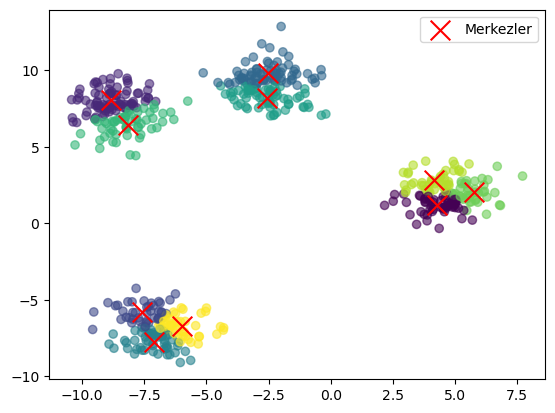

In [20]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt 

x,y = make_blobs(n_samples = 560 , centers = 4 , random_state = 42 )

km = KMeans(n_clusters = 10 , random_state = 42)

km.fit(x)

centers = km.cluster_centers_
labels = km.labels_

plt.scatter(x[:,0], x[:,1], c=labels, cmap="viridis" , alpha = 0.6)
plt.scatter(centers[:,0], centers[:,1],c="red" , s=200, marker="x" ,label = "Merkezler")
plt.legend()
plt.show()


In [39]:
from sklearn.datasets import load_iris 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

import pandas as pd
df = pd.read_csv('diabetes.csv')

x = df[['Glucose', 'Insulin' , 'BMI' ]]

df['Outcome'] = df['Outcome'].replace({'Yes' : 1 , 'No' : 0 })

y =df['Outcome']

x_train, x_test , y_train , y_test = train_test_split(x ,y , test_size =0.2, random_state =42)

pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("PCA" , PCA(n_components = 2)),
    ("knn" , KNeighborsClassifier(n_neighbors = 5 ))])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print(accuracy_score(y_pred,y_test))



0.7012987012987013


In [38]:
from sklearn.datasets import load_iris 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import pandas as pd
df = pd.read_csv('diabetes.csv')

x = df[['Glucose', 'Insulin' , 'BMI' ]]

df['Outcome'] = df['Outcome'].replace({'Yes' : 1 , 'No' : 0 })

y =df['Outcome']

x_train, x_test , y_train , y_test = train_test_split(x ,y , test_size =0.2, random_state =42)

pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("knn" , KNeighborsClassifier(n_neighbors = 5 ))])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print(accuracy_score(y_pred,y_test))


0.7077922077922078


In [36]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("walekhwatlphilip/intro-to-data-cleaning-eda-and-machine-learning")

print("Path to dataset files:", path)

100%|██████████| 9.73k/9.73k [00:00<00:00, 9.49MB/s]

Extracting files...
Path to dataset files: C:\Users\Anonim\.cache\kagglehub\datasets\walekhwatlphilip\intro-to-data-cleaning-eda-and-machine-learning\versions\349


In [35]:
pip install kagglehub

Note: you may need to restart the kernel to use updated packages.


In [37]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("akshaydattatraykhare/diabetes-dataset")

print("Path to dataset files:", path)

100%|██████████| 8.91k/8.91k [00:00<00:00, 1.63MB/s]

Extracting files...
Path to dataset files: C:\Users\Anonim\.cache\kagglehub\datasets\akshaydattatraykhare\diabetes-dataset\versions\1
